# What is Interpolation?

Interpolation is the technique that approximates f(x) at all points of a sample vector (x and y)

## Importing libraries

To start our game, we have to import these libraries:

* Numpy, to help us with arrays
* Matplotlib, to show our results ia a beautiful graph

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## The samples
In this case, we have to approximate f(x) -> tan(x). The samples were written below:

In [12]:
x = np.array([1,1.1,1.2,1.3])
y = np.array([1.5574,1.9648,2.5722,3.6021])

## Linear Interpolation
Linear expression is defined by:

<img src="https://bit.ly/3vcHloG" align="center" border="0" alt="P_{1} (x) =  y_{0}- \frac{y_{1}-y_{0}}{x_{1}-x_{0}}*(x-x_{0}) " width="256" height="43" />

In [13]:
def linear(v):
    for i in range(1,x.shape[0]):
        if x[i] >= v:
            return y[i-1]+((y[i-1]-y[i])/(x[i-1]-x[i]))*(v-x[i-1])
    return 0

## Divided Difference

To solve using Newton, we have to develop the divided difference, and it works something like this:

<img src="https://bit.ly/3ry4nUp" align="center" border="0" alt="f[x_{0}] = f(x_{0})" width="111" height="19" /></br>

<img src="https://bit.ly/3vakVEo" align="center" border="0" alt="f[x_{0},x_{1}] =  \frac{ f(x_{1})- f(x_{0})}{x_{1}-x_{0}} " width="204" height="46" /></br>

<img src="https://bit.ly/3buEZJS" align="center" border="0" alt="f[x_{0},x_{1},x_{2}] =  \frac{ f[x_{1},x_{2}]-f[x_{0},x_{1}]}{x_{2}-x_{0}}" width="290" height="46" /></br>

<img src="https://bit.ly/3l9e9u4" align="center" border="0" alt="f[x_{0},x_{1}....,x_{n-1},x_{n}] =  \frac{ f[x_{1},....,x_{n-1},x_{n}]-f[x_{0},x_{1},....,x_{n-1}]}{x_{n}-x_{0}} " width="514" height="46" /></br>

In [14]:
def divided_difference(x,y):
    n = len(x)-1
    if n==0:
        return y[0]
    elif n==1:
        return (y[1]-y[0])/(x[1]-x[0])
    v1 = divided_difference(x[1:],y[1:])
    v2 = divided_difference(x[:n],y[:n])
    return (v1-v2)/(x[n]-x[0])

## Newton

This algorithm work to generate a polinomyal equation. It'll be defined below:

<img src="https://bit.ly/2PSPY7H" align="center" border="0" alt="P_{n}(x) = P_{n-1}(x)+f[x_{0},....,x_{n}](x-x_{0})...(x-x_{n-1})" width="419" height="19" />

In [15]:
def newton(n_x):
    r,x_v,y_v = 0,[],[]
    for x_,y_ in zip(x,y):
        x_v.append(x_)
        y_v.append(y_)
        act = divided_difference(x_v,y_v)
        for j in x_v[:len(x_v)-1]:
            act *= (n_x-j)
        r+=act
    return r

## Lagrange

This is defined by:

<img src="https://bit.ly/3ckmc2V" align="center" border="0" alt="P_{n}(x) =   \prod_{j=0 j\neq i}^n \frac{x-x_{j}}{x_{i}-x_{j}}  " width="164" height="53" />

In [16]:
def lagrange(z):
    r,n = 0,x.shape[0]
    for i in range(n):
        c,d = 1,1
        for j in range(n):
            if(i!=j):
                c *= (z-x[j])
                d *= (x[i]-x[j])
        r += y[i]*(c/d)
    return r

## Show the results

Utilizing Matplotlib we'll show the results graph

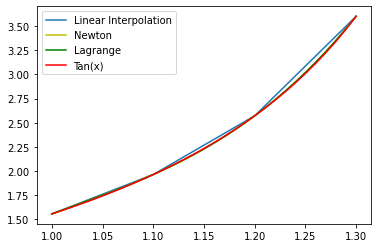

In [17]:
t1 = [i/100 for i in range(100,131)]
plt.figure()
plt.plot(t1,[linear(i) for i in t1],label="Linear Interpolation")
plt.plot(t1,[newton(i) for i in t1],label="Newton",c="y")
plt.plot(t1,[lagrange(i) for i in t1],label="Lagrange",c='g')
plt.plot(t1,np.tan(t1),c="r",label="Tan(x)")
plt.legend()